In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install seaborn

## Full Time Defensemen Under 23 Years Old
Get a list of defensemen playing in the NHL under 23 years old and at least 41 games played. These players are likely on their entry level deal.
Data courtesy of https://www.hockey-reference.com/leagues/NHL_2020_skaters.html

In [4]:
df_ages = pd.read_csv('/Users/williamshaw/downloads/skater_ages.csv')

In [5]:
# filter by age and pos
# df_ages = df_ages[df_ages['Age'] <= 23]
df_ages = df_ages[df_ages['Pos'] == 'D']
# df_ages = df_ages[df_ages['GP'] >= 41]

# convert name to first/last name only
defensemen_u23 = df_ages['Player'].to_list()
for i in range(0, len(defensemen_u23)):
    defensemen_u23[i] = defensemen_u23[i].split('\\')[0]
    
# copy into dataframe and drop old naming convention
df_defensemen = df_ages[['Player', 'Age']].copy()
df_defensemen['name'] = defensemen_u23
df_defensemen = df_defensemen[['name', 'Age']].copy()

# sort a-z
df_defensemen.sort_values(by='name', inplace=True)
df_defensemen.head()

,name,Age
246,Aaron Ekblad,23
669,Aaron Ness,29
84,Adam Boqvist,19
291,Adam Fox,21
544,Adam Larsson,27


## Get advanced stats
Courtesty of moneypuck.com

In [6]:
df = pd.read_csv('/Users/williamshaw/downloads/skaters2019_20.csv')

In [7]:
df_all = df[df['situation']=='all']
df_all = df_all[df_all['position']=='D']

In [8]:
for col in df_all.columns: 
    print(col) 

playerId
season
name
team
position
situation
games_played
icetime
shifts
gameScore
onIce_xGoalsPercentage
offIce_xGoalsPercentage
onIce_corsiPercentage
offIce_corsiPercentage
onIce_fenwickPercentage
offIce_fenwickPercentage
iceTimeRank
I_F_xOnGoal
I_F_xGoals
I_F_xRebounds
I_F_xFreeze
I_F_xPlayStopped
I_F_xPlayContinuedInZone
I_F_xPlayContinuedOutsideZone
I_F_flurryAdjustedxGoals
I_F_scoreVenueAdjustedxGoals
I_F_flurryScoreVenueAdjustedxGoals
I_F_primaryAssists
I_F_secondaryAssists
I_F_shotsOnGoal
I_F_missedShots
I_F_blockedShotAttempts
I_F_shotAttempts
I_F_points
I_F_goals
I_F_rebounds
I_F_reboundGoals
I_F_freeze
I_F_playStopped
I_F_playContinuedInZone
I_F_playContinuedOutsideZone
I_F_savedShotsOnGoal
I_F_savedUnblockedShotAttempts
penalties
I_F_penalityMinutes
I_F_faceOffsWon
I_F_hits
I_F_takeaways
I_F_giveaways
I_F_lowDangerShots
I_F_mediumDangerShots
I_F_highDangerShots
I_F_lowDangerxGoals
I_F_mediumDangerxGoals
I_F_highDangerxGoals
I_F_lowDangerGoals
I_F_mediumDangerGoals
I_F_highD

In [9]:
df_all[['name', 'I_F_shotsOnGoal', 'I_F_shotAttempts']]

,name,I_F_shotsOnGoal,I_F_shotAttempts
6,Ilya Lyubushkin,41.0,90.0
26,Gabriel Carlsson,3.0,7.0
36,Vince Dunn,135.0,265.0
46,Johnny Boychuk,96.0,212.0
51,Thomas Chabot,187.0,418.0
...,...,...,...
4311,Ethan Bear,99.0,180.0
4321,Josh Morrissey,120.0,258.0
4351,Noah Dobson,37.0,79.0
4361,Dmitry Kulikov,54.0,141.0


In [10]:
df_all['shot_on_goal_percent'] = df_all['I_F_shotsOnGoal'] / df_all['I_F_shotAttempts']
df_all['avg_icetime'] = df_all['icetime'] / df_all['games_played'] / 60


In [29]:
# df_all.sort_values(by='shot_on_goal_percent', ascending=False)
df_final = df_all[['name',
                    'team',
                    'position',
#                     'situation',
                    'games_played',
                    'icetime',
                    'shifts',
                    'gameScore',
                    'I_F_xOnGoal',
                    'I_F_xGoals',
                    'I_F_xRebounds',
                    'I_F_xFreeze',
                    'I_F_xPlayStopped',
                    'I_F_xPlayContinuedInZone',
                    'I_F_xPlayContinuedOutsideZone',
                    'I_F_flurryAdjustedxGoals',
                    'I_F_scoreVenueAdjustedxGoals',
                    'I_F_flurryScoreVenueAdjustedxGoals',
                    'I_F_primaryAssists',
                    'I_F_secondaryAssists',
                    'I_F_shotsOnGoal',
                    'I_F_missedShots',
                    'I_F_blockedShotAttempts',
                    'I_F_shotAttempts',
                    'I_F_points',
                    'I_F_goals',
                    'I_F_rebounds',
                    'I_F_reboundGoals',
#                     'I_F_freeze',
#                     'I_F_playStopped',
#                     'I_F_playContinuedInZone',
#                     'I_F_playContinuedOutsideZone',
                    'I_F_savedShotsOnGoal',
                    'I_F_savedUnblockedShotAttempts',
                    'penalties',
                    'I_F_penalityMinutes',
                    'I_F_hits',
                    'I_F_takeaways',
                    'I_F_giveaways',
                    'shot_on_goal_percent',
                    'avg_icetime']].copy()

In [30]:
df_final.sort_values(by='name', inplace=True)
df_tmp = df_defensemen.merge(df_final, on='name', how='left')
df_tmp.head()

,name,Age,team,position,games_played,icetime,shifts,gameScore,I_F_xOnGoal,I_F_xGoals,...,I_F_reboundGoals,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_hits,I_F_takeaways,I_F_giveaways,shot_on_goal_percent,avg_icetime
0,Aaron Ekblad,23,FLA,D,66.0,90921.0,1812.0,52.33,128.69,6.65,...,0.0,142.0,182.0,14.0,26.0,32.0,36.0,73.0,0.554717,22.959848
1,Aaron Ness,29,ARI,D,24.0,18049.0,437.0,2.93,12.58,0.40,...,0.0,11.0,19.0,0.0,0.0,17.0,1.0,8.0,0.407407,12.534028
2,Adam Boqvist,19,CHI,D,41.0,39781.0,803.0,13.36,46.64,2.07,...,0.0,46.0,65.0,3.0,6.0,33.0,10.0,26.0,0.467290,16.171138
3,Adam Fox,21,NYR,D,70.0,79388.0,1637.0,46.02,119.94,6.48,...,2.0,117.0,165.0,16.0,32.0,35.0,57.0,61.0,0.514403,18.901905
4,Adam Larsson,27,EDM,D,49.0,57908.0,1140.0,5.90,62.38,2.40,...,0.0,57.0,90.0,11.0,25.0,112.0,16.0,35.0,0.467742,19.696599


## Find correlation

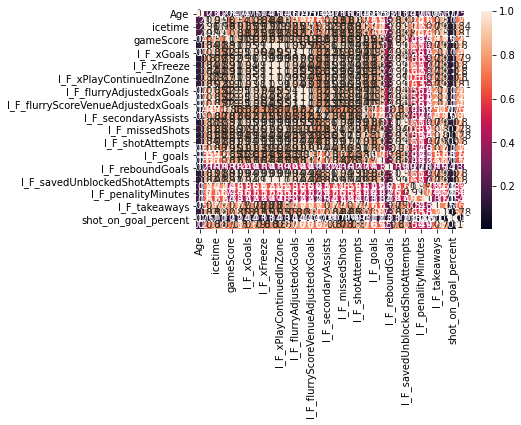

In [31]:
corrMatrix = df_tmp.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [32]:
corrMatrix['Age']

Age                                   1.000000
games_played                          0.228954
icetime                               0.219467
shifts                                0.228790
gameScore                             0.046871
I_F_xOnGoal                           0.138594
I_F_xGoals                            0.075197
I_F_xRebounds                         0.112283
I_F_xFreeze                           0.144586
I_F_xPlayStopped                      0.152856
I_F_xPlayContinuedInZone              0.135986
I_F_xPlayContinuedOutsideZone         0.155018
I_F_flurryAdjustedxGoals              0.073688
I_F_scoreVenueAdjustedxGoals          0.074616
I_F_flurryScoreVenueAdjustedxGoals    0.072989
I_F_primaryAssists                    0.044281
I_F_secondaryAssists                  0.096552
I_F_shotsOnGoal                       0.127962
I_F_missedShots                       0.164838
I_F_blockedShotAttempts               0.125794
I_F_shotAttempts                      0.137336
I_F_points   

<AxesSubplot:xlabel='Age', ylabel='shot_on_goal_percent'>

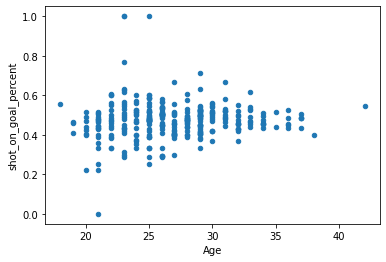

In [33]:
df_tmp.plot.scatter(x='Age', y='shot_on_goal_percent')

In [28]:
# calculate average for all defensemen and look at areas where younger defensemen (age 23 and under) differ
print(df_tmp['penalties'].mean())
print(df_tmp['penalties'].std())


9.221556886227544
6.997126134735809
